# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [5]:
weather_api_key


'ddf6498b2f217c14c28f9caa370fbb82'

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


In [7]:
lats

array([-71.35451561, -72.37098202, -72.66933073, ...,  77.89636806,
        29.98465501, -85.82393187])

In [8]:
cities

['puerto natales',
 'blackmans bay',
 'grytviken',
 'bethel',
 'sisimiut',
 'isafjordur',
 'adamstown',
 'edinburgh of the seven seas',
 'hirara',
 'alice springs',
 "yangi qal'ah",
 'ilulissat',
 'taltal',
 'yukhnov',
 'port-aux-francais',
 'waitangi',
 'nhlangano',
 'constantia',
 'stanley',
 'caleta de carquin',
 'tabou',
 'cabo san lucas',
 'gebeit',
 'avarua',
 'lethem',
 'olonkinbyen',
 'papatowai',
 'puerto ayora',
 'puerto baquerizo moreno',
 'ushuaia',
 'bikenibeu village',
 'gadzhiyevo',
 'al khafji',
 'sirte',
 'sang-e charak',
 'el calafate',
 'albany',
 'kone',
 'devinuwara',
 'remire-montjoly',
 'rurrenabaque',
 'paita',
 'yellowknife',
 'the pas',
 'hasaki',
 'chulakkurgan',
 'dunedin',
 'konskie',
 'tolanaro',
 'cargados carajos',
 'talnakh',
 'vila franca do campo',
 'enewetak',
 'invercargill',
 'funadhoo',
 'iqaluit',
 'motygino',
 'nurota',
 'keflavik',
 'saudarkrokur',
 'punta arenas',
 'kenai',
 'usogorsk',
 'luderitz',
 'taiohae',
 'east end',
 'georgetown',
 'hi

In [9]:
lngs

array([-92.48862863, 149.16586022, -42.2750764 , ..., -88.70362164,
        73.96299001, 125.35501381])

In [10]:
lat_lng[0]

-85.8239318677428

In [11]:
lat_lng[1]

125.35501380752027

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [12]:
#weather_api_key
#http://api.openweathermap.org/data/2.5/weather?q=Paris&appid=ddf6498b2f217c14c28f9caa370fbb82&units=metric

In [13]:
# Set the API base URL
# url = "http://api.openweathermap.org/data/2.5/weather?q={city}&appid={config.API_KEY}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =requests.get(city_url).json()
        print(json.dumps(city_weather, indent=4, sort_keys=True))

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_weather['coord']['lat']
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']["all"]
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

     
    # If an error is experienced, skip the city
    except:

        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": -51.7236,
        "lon": -72.4875
    },
    "dt": 1728580496,
    "id": 3874958,
    "main": {
        "feels_like": 4.07,
        "grnd_level": 996,
        "humidity": 57,
        "pressure": 1000,
        "sea_level": 1000,
        "temp": 8.25,
        "temp_max": 8.25,
        "temp_min": 8.25
    },
    "name": "Puerto Natales",
    "rain": {
        "1h": 0.2
    },
    "sys": {
        "country": "CL",
        "id": 8495,
        "sunrise": 1728554160,
        "sunset": 1728602239,
        "type": 1
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10d",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 280,
        "speed"

Processing Record 2 of Set 1 | blackmans bay
{
    "base": "stations",
    "clouds": {
        "all": 78
    },
    "cod": 200,
    "coord": {
        "lat": -43.0167,
        "lon": 147.3167
    },
    "dt": 1728580497,
    "id": 2175527,
    "main": {
        "feels_like": 9.7,
        "grnd_level": 996,
        "humidity": 60,
        "pressure": 1014,
        "sea_level": 1014,
        "temp": 9.7,
        "temp_max": 9.85,
        "temp_min": 9.07
    },
    "name": "Blackmans Bay",
    "sys": {
        "country": "AU",
        "id": 2011256,
        "sunrise": 1728588378,
        "sunset": 1728635302,
        "type": 2
    },
    "timezone": 39600,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 45,
        "gust": 1.34,
        "speed": 0.89
    }
}
Processing Record 3 of Set 1 | grytviken
{
    "base": "stat

In [14]:
# Convert the cities weather data into a Pandas DataFrame
#city_data_df
    
# Show Record Count
city_data_df= pd.DataFrame(city_data)

In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,8.25,57,75,9.26,CL,1728580496
1,blackmans bay,-43.0167,147.3167,9.85,60,78,0.89,AU,1728580497
2,grytviken,-54.2811,-36.5092,-0.43,93,68,1.08,GS,1728580498
3,bethel,41.3712,-73.4140,15.59,51,20,4.63,US,1728580499
4,sisimiut,66.9395,-53.6735,3.87,66,7,1.97,GL,1728580500


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [17]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,8.25,57,75,9.26,CL,1728580496
1,blackmans bay,-43.0167,147.3167,9.85,60,78,0.89,AU,1728580497
2,grytviken,-54.2811,-36.5092,-0.43,93,68,1.08,GS,1728580498
3,bethel,41.3712,-73.4140,15.59,51,20,4.63,US,1728580499
4,sisimiut,66.9395,-53.6735,3.87,66,7,1.97,GL,1728580500


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [18]:
lat=city_data_df["Lat"]
Maxtemp=city_data_df["Max Temp"]

lat.head()


City_ID
0   -51.7236
1   -43.0167
2   -54.2811
3    41.3712
4    66.9395
Name: Lat, dtype: float64

In [19]:
#ex
?plt.scatter
    

Signature:
plt.scatter(
    x: 'float | ArrayLike',
    y: 'float | ArrayLike',
    s: 'float | ArrayLike | None' = None,
    c: 'ArrayLike | Sequence[ColorType] | ColorType | None' = None,
    marker: 'MarkerType | None' = None,
    cmap: 'str | Colormap | None' = None,
    norm: 'str | Normalize | None' = None,
    vmin: 'float | None' = None,
    vmax: 'float | None' = None,
    alpha: 'float | None' = None,
    linewidths: 'float | Sequence[float] | None' = None,
    *,
    edgecolors: "Literal['face', 'none'] | ColorType | Sequence[ColorType] | None" = None,
    plotnonfinite: 'bool' = False,
    data=None,
    **kwargs,
) -> 'PathCollection'
Docstring:
A scatter plot of *y* vs. *x* with varying marker size and/or color.

Parameters
----------
x, y : float or array-like, shape (n, )
    The data positions.

s : float or array-like, shape (n, ), optional
    The marker size in points**2 (typographic points are 1/72 in.).
    Default is ``rcParams['lines.markersize'] ** 2``.

    Th

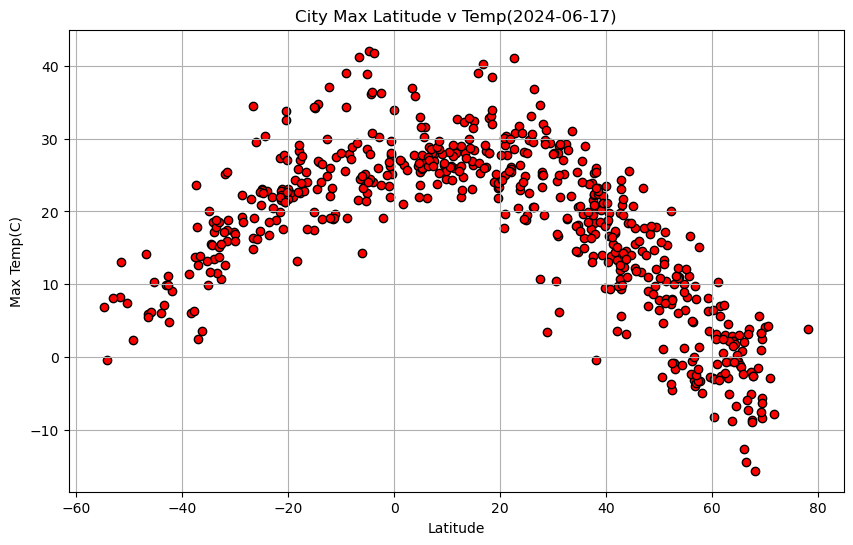

In [20]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 6))

plt.scatter(
    x=lat, 
    y=Maxtemp, 
    marker="o",
    facecolors="red",
    edgecolors="black",
)
plt.title("City Max Latitude v Temp(2024-06-17)"),
plt.xlabel("Latitude"),
plt.ylabel("Max Temp(C)"),
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

plt.show()


In [21]:
dir(plt)

['AbstractContextManager',
 'Annotation',
 'Arrow',
 'Artist',
 'AutoLocator',
 'AxLine',
 'Axes',
 'Button',
 'Circle',
 'Enum',
 'ExitStack',
 'Figure',
 'FigureBase',
 'FigureCanvasBase',
 'FigureManagerBase',
 'FixedFormatter',
 'FixedLocator',
 'FormatStrFormatter',
 'Formatter',
 'FuncFormatter',
 'GridSpec',
 'IndexLocator',
 'Line2D',
 'LinearLocator',
 'Locator',
 'LogFormatter',
 'LogFormatterExponent',
 'LogFormatterMathtext',
 'LogLocator',
 'MaxNLocator',
 'MouseButton',
 'MultipleLocator',
 'Normalize',
 'NullFormatter',
 'NullLocator',
 'PolarAxes',
 'Polygon',
 'Rectangle',
 'ScalarFormatter',
 'Slider',
 'Subplot',
 'SubplotSpec',
 'TYPE_CHECKING',
 'Text',
 'TickHelper',
 'Widget',
 '_REPL_DISPLAYHOOK',
 '_ReplDisplayHook',
 '__annotations__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_api',
 '_auto_draw_if_interactive',
 '_backend_mod',
 '_color_sequences',
 '_colormaps',
 '_copy_docstring_and_

#### Latitude Vs. Humidity

In [22]:
#city_data_df

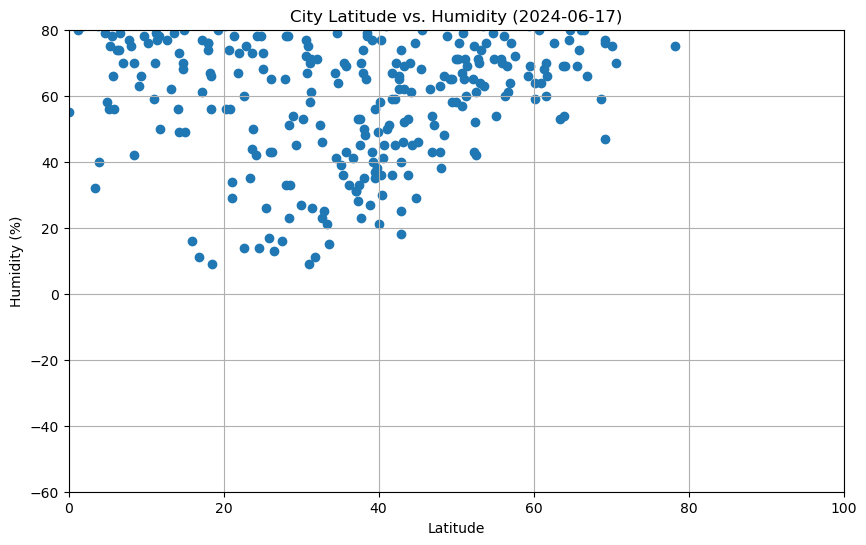

In [23]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o')
plt.title("City Latitude vs. Humidity (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(0, 100)  # Set x-axis limits
plt.ylim(-60, 80)  # Set y-axis limits
plt.grid(True)
#plt.show()

#x_limit = 100
#x_axis = np.arange(0, x_limit, 1)
#plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black",
#            s=x_axis, alpha=0.75)
#plt.show()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

In [24]:

Cloudiness=city_data_df["Cloudiness"]


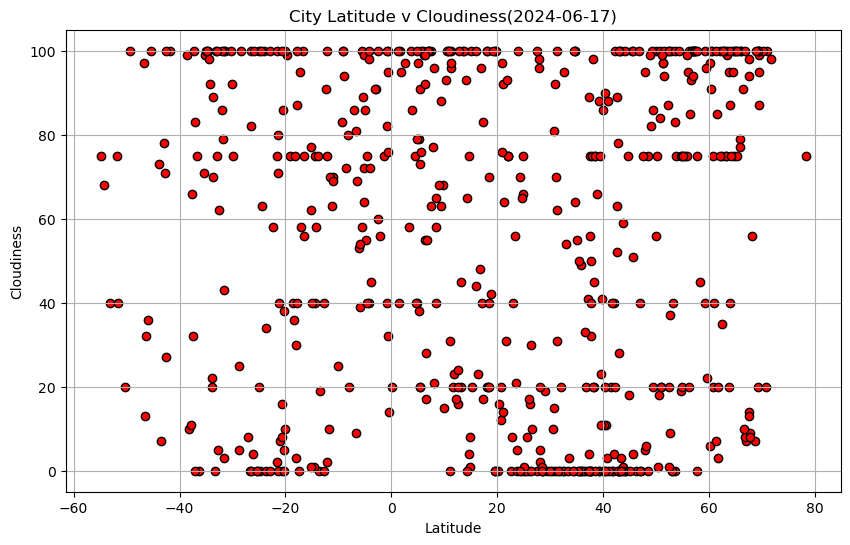

['AbstractContextManager',
 'Annotation',
 'Arrow',
 'Artist',
 'AutoLocator',
 'AxLine',
 'Axes',
 'Button',
 'Circle',
 'Enum',
 'ExitStack',
 'Figure',
 'FigureBase',
 'FigureCanvasBase',
 'FigureManagerBase',
 'FixedFormatter',
 'FixedLocator',
 'FormatStrFormatter',
 'Formatter',
 'FuncFormatter',
 'GridSpec',
 'IndexLocator',
 'Line2D',
 'LinearLocator',
 'Locator',
 'LogFormatter',
 'LogFormatterExponent',
 'LogFormatterMathtext',
 'LogLocator',
 'MaxNLocator',
 'MouseButton',
 'MultipleLocator',
 'Normalize',
 'NullFormatter',
 'NullLocator',
 'PolarAxes',
 'Polygon',
 'Rectangle',
 'ScalarFormatter',
 'Slider',
 'Subplot',
 'SubplotSpec',
 'TYPE_CHECKING',
 'Text',
 'TickHelper',
 'Widget',
 '_REPL_DISPLAYHOOK',
 '_ReplDisplayHook',
 '__annotations__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_api',
 '_auto_draw_if_interactive',
 '_backend_mod',
 '_color_sequences',
 '_colormaps',
 '_copy_docstring_and_

In [25]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10, 6))

plt.scatter(
    x=lat, 
    y=Cloudiness, 
    marker="o",
    facecolors="red",
    edgecolors="black",
)
plt.title("City Latitude v Cloudiness(2024-06-17)"),
plt.xlabel("Latitude"),
plt.ylabel("Cloudiness"),
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

plt.show()
dir(plt)


#### Latitude vs. Wind Speed Plot

In [26]:

WindSpeed=city_data_df["Wind Speed"]

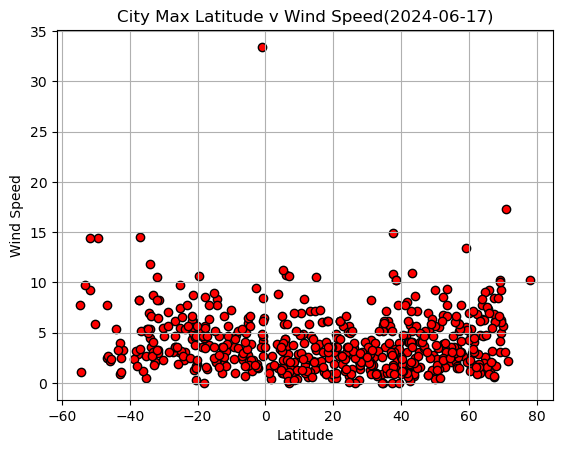

['AbstractContextManager',
 'Annotation',
 'Arrow',
 'Artist',
 'AutoLocator',
 'AxLine',
 'Axes',
 'Button',
 'Circle',
 'Enum',
 'ExitStack',
 'Figure',
 'FigureBase',
 'FigureCanvasBase',
 'FigureManagerBase',
 'FixedFormatter',
 'FixedLocator',
 'FormatStrFormatter',
 'Formatter',
 'FuncFormatter',
 'GridSpec',
 'IndexLocator',
 'Line2D',
 'LinearLocator',
 'Locator',
 'LogFormatter',
 'LogFormatterExponent',
 'LogFormatterMathtext',
 'LogLocator',
 'MaxNLocator',
 'MouseButton',
 'MultipleLocator',
 'Normalize',
 'NullFormatter',
 'NullLocator',
 'PolarAxes',
 'Polygon',
 'Rectangle',
 'ScalarFormatter',
 'Slider',
 'Subplot',
 'SubplotSpec',
 'TYPE_CHECKING',
 'Text',
 'TickHelper',
 'Widget',
 '_REPL_DISPLAYHOOK',
 '_ReplDisplayHook',
 '__annotations__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_api',
 '_auto_draw_if_interactive',
 '_backend_mod',
 '_color_sequences',
 '_colormaps',
 '_copy_docstring_and_

In [27]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    x=lat, 
    y=WindSpeed, 
    marker="o",
    facecolors="red",
    edgecolors="black",
)
plt.title("City Max Latitude v Wind Speed(2024-06-17)"),
plt.xlabel("Latitude"),
plt.ylabel("Wind Speed"),
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

plt.show()
dir(plt)

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [28]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def liner_regression_plot(df, x_column, y_column, title):
        #scatter plot
    plt.figure(figsize=(9,6))
    x_values = df[x_column]
    y_values = df[y_column]

    #linear regression for temp vs lat
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    #regression values
    regress_values = x_values * slope + intercept

    #line equation string
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

    # Create plot:
    plt.scatter(x_values,y_values, marker='o', color='blue', s=[70], edgecolors='black')
    plt.plot(x_values,regress_values, 'pink', linewidth=2)

    #graph properties
    plt.title(title, fontsize=20)
    plt.ylabel(y_column, fontsize=16, color='black')
    plt.xlabel(x_column, fontsize=16, color='black')
    plt.annotate(line_eq,(1, 1), fontsize=18, color='red')
    #plt.grid(False)

    # imits  y axis:
    #plt.ylim(min(city_data['Max Temp (F)'])-10, max(city_data['Max Temp (F)'])+10)

    #limits x axis:
    #plt.xlim(-10, max(city_data['Lat'])+10)

    plt.savefig(f"output_data/{title}.png")

    # Show plot
    plt.show()

    # Print r^2 value
    print(f"The r^2-value is: {rvalue**2}")
    

In [29]:
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,8.25,57,75,9.26,CL,1728580496
1,blackmans bay,-43.0167,147.3167,9.85,60,78,0.89,AU,1728580497
2,grytviken,-54.2811,-36.5092,-0.43,93,68,1.08,GS,1728580498
3,bethel,41.3712,-73.4140,15.59,51,20,4.63,US,1728580499
4,sisimiut,66.9395,-53.6735,3.87,66,7,1.97,GL,1728580500
...,...,...,...,...,...,...,...,...,...
578,nangong,37.3581,115.3744,13.12,28,0,2.78,CN,1728581157
579,kundiawa,-6.0167,144.9667,14.25,95,54,1.71,PG,1728581158
580,dock junction,31.2025,-81.5168,24.99,70,100,8.23,US,1728581159


In [30]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df['Lat'] < 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,8.25,57,75,9.26,CL,1728580496
1,blackmans bay,-43.0167,147.3167,9.85,60,78,0.89,AU,1728580497
2,grytviken,-54.2811,-36.5092,-0.43,93,68,1.08,GS,1728580498
6,adamstown,-25.0660,-130.1015,20.86,86,100,7.45,PN,1728580502
7,edinburgh of the seven seas,-37.0676,-12.3116,12.61,74,83,14.57,SH,1728580503


In [31]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,8.25,57,75,9.26,CL,1728580496
1,blackmans bay,-43.0167,147.3167,9.85,60,78,0.89,AU,1728580497
2,grytviken,-54.2811,-36.5092,-0.43,93,68,1.08,GS,1728580498
6,adamstown,-25.0660,-130.1015,20.86,86,100,7.45,PN,1728580502
7,edinburgh of the seven seas,-37.0676,-12.3116,12.61,74,83,14.57,SH,1728580503


###  Temperature vs. Latitude Linear Regression Plot

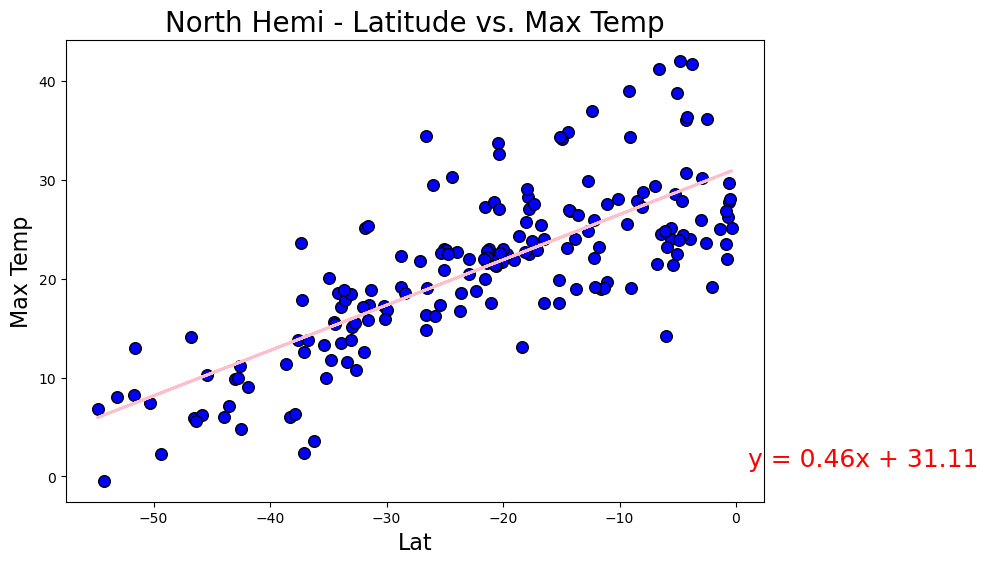

The r^2-value is: 0.5867780935356857


In [32]:
liner_regression_plot(northern_hemi_df, 'Lat', 'Max Temp', 'North Hemi - Latitude vs. Max Temp')

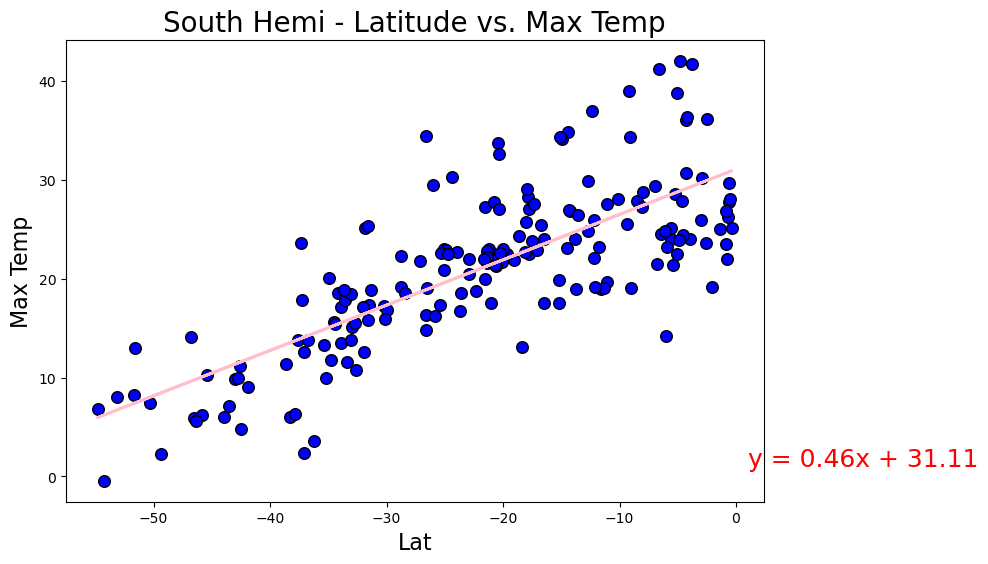

The r^2-value is: 0.5867780935356857


In [33]:
liner_regression_plot(southern_hemi_df, 'Lat', 'Max Temp', 'South Hemi - Latitude vs. Max Temp')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [34]:
#Strong relationship btwn latitude and max temp both hemispheres have positive correlation 

### Humidity vs. Latitude Linear Regression Plot

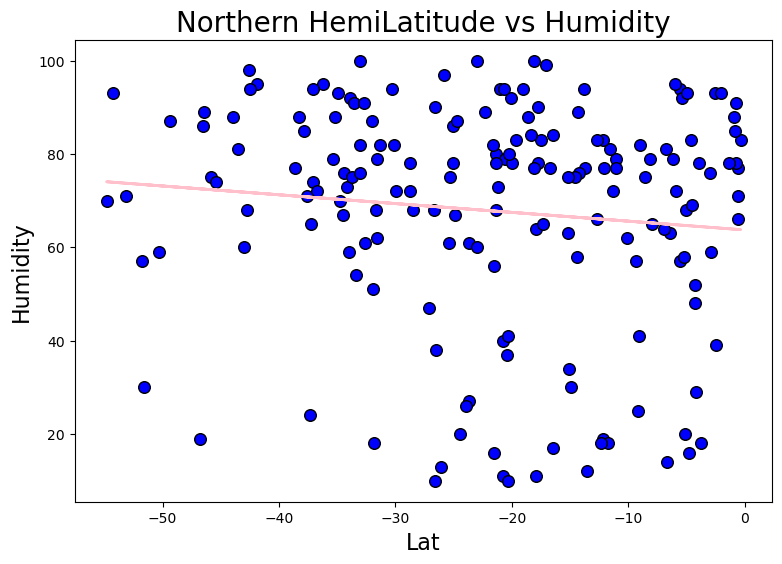

The r^2-value is: 0.011661452115266997


In [35]:
liner_regression_plot(northern_hemi_df, 'Lat', 'Humidity', 'Northern HemiLatitude vs Humidity')

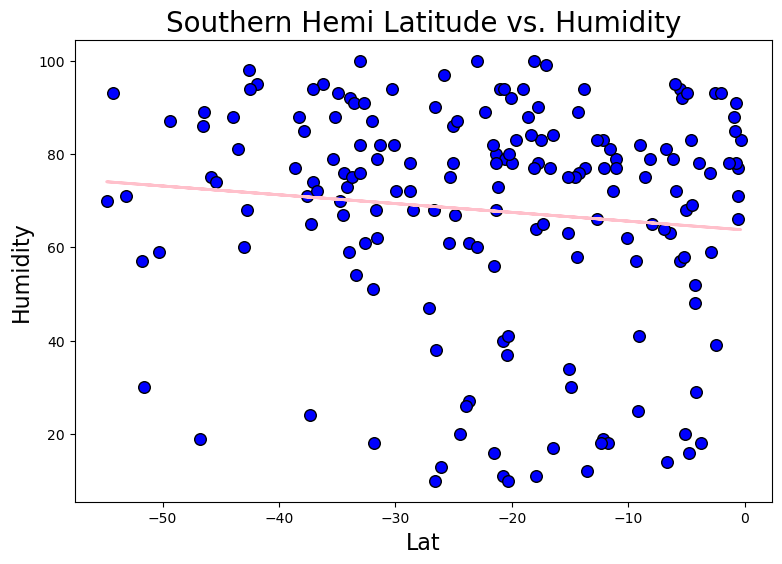

The r^2-value is: 0.011661452115266997


In [48]:
liner_regression_plot(southern_hemi_df, 'Lat', 'Humidity', 'Southern Hemi Latitude vs. Humidity')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [39]:
#no relationship

### Cloudiness vs. Latitude Linear Regression Plot

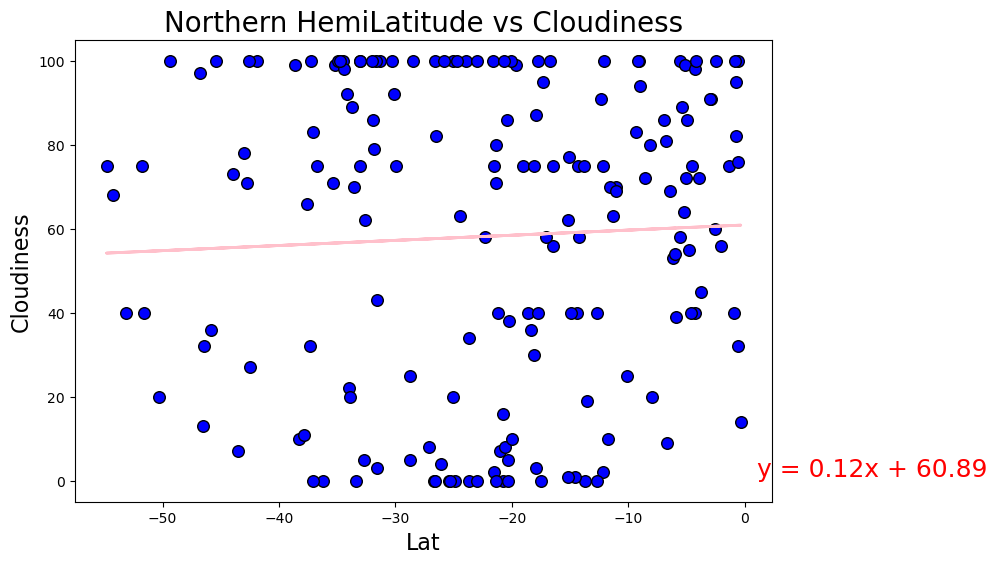

The r^2-value is: 0.002195784673552527


In [41]:
liner_regression_plot(northern_hemi_df, 'Lat', 'Cloudiness', 'Northern HemiLatitude vs Cloudiness')

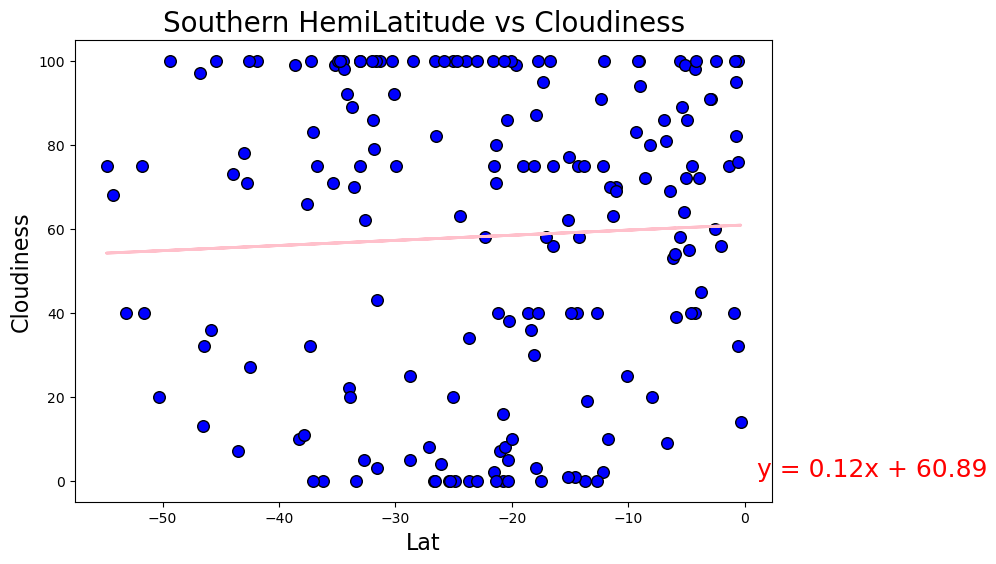

The r^2-value is: 0.002195784673552527


In [49]:
liner_regression_plot(southern_hemi_df, 'Lat', 'Cloudiness', 'Southern HemiLatitude vs Cloudiness')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#no relationship

### Wind Speed vs. Latitude Linear Regression Plot

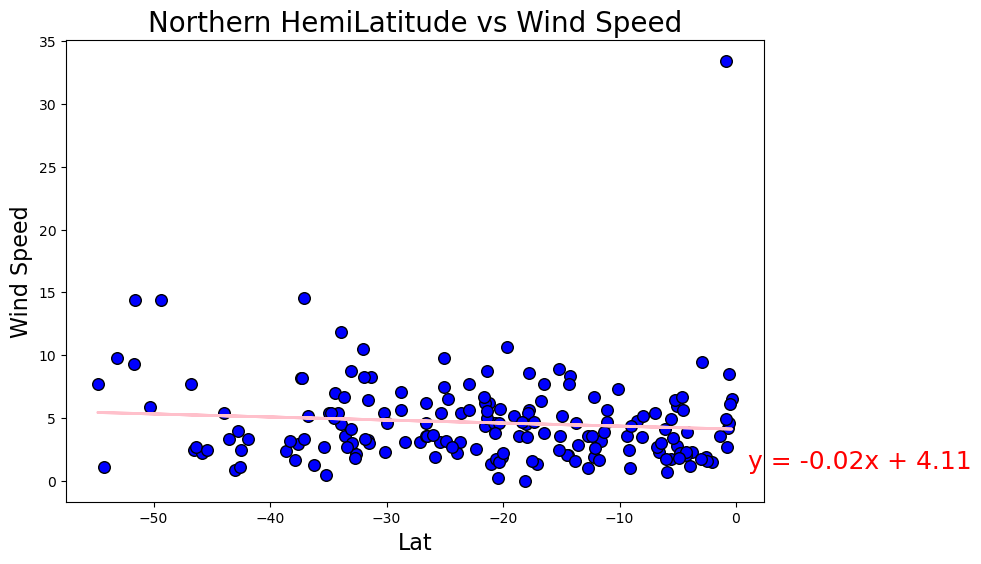

The r^2-value is: 0.009302745317365801


In [50]:
liner_regression_plot(northern_hemi_df, 'Lat', 'Wind Speed', 'Northern HemiLatitude vs Wind Speed')

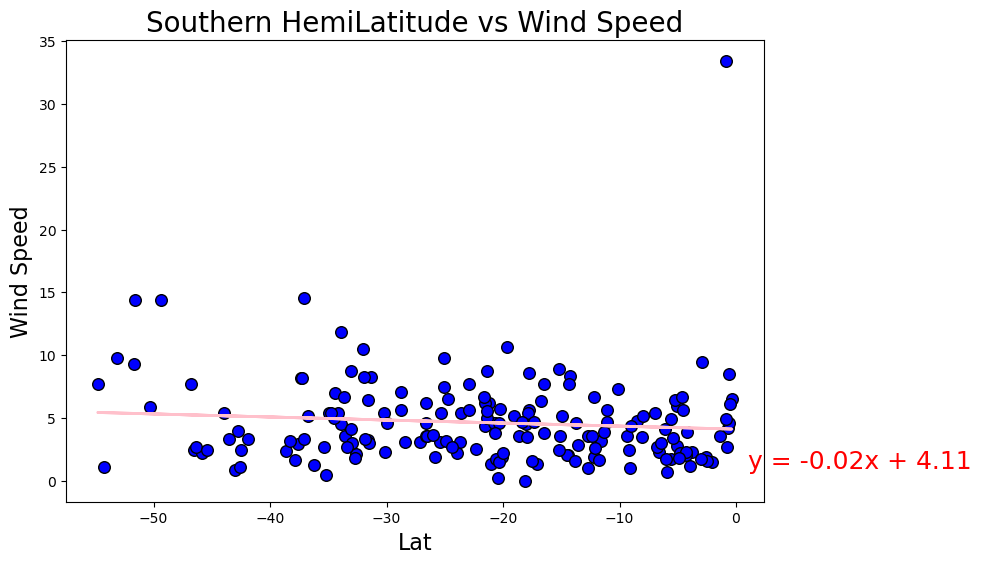

The r^2-value is: 0.009302745317365801


In [52]:
liner_regression_plot(southern_hemi_df, 'Lat', 'Wind Speed', 'Southern HemiLatitude vs Wind Speed')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#no relationship